<a href="https://colab.research.google.com/github/MithunKiniStar/AutoEncodersFaceSketch/blob/main/Deep_Convolutional_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Convolutional autoencoder**

Data Preprocessing

In [ ]:
import numpy as np
import tensorflow as tf
import keras 
from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Input
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm 
import os
import re 
# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


# defining the size of image 
SIZE = 256

image_path = '/content/photos'
img_array = []

sketch_path = '/content/sketches'
sketch_array = []

image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))


for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)
    print("Image is ",image)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    img_array.append(img_to_array(image))
    # Image Augmentation
    
    # horizontal flip 
    img1 = cv2.flip(image,1)
    img_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    img_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    img_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    img_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    img_array.append(img_to_array(img7))
  
    
for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_array.append(img_to_array(image))
    
    #Image Augmentation
    # horizontal flip 
    img1 = cv2.flip(image,1)
    sketch_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    sketch_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    sketch_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    sketch_array.append(img_to_array(img7))

In [2]:
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))

Total number of sketch images: 1504
Total number of images: 1504


In [3]:
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))
train_sketch_image = sketch_array[:1400]
train_image = img_array[:1400]
test_sketch_image = sketch_array[1400:]
test_image = img_array[1400:]
# reshaping
train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train color image shape:',train_image.shape)
test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test color image shape',test_image.shape)

Total number of sketch images: 1504
Total number of images: 1504
Train color image shape: (1400, 256, 256, 3)
Test color image shape (104, 256, 256, 3)


Train Model for Face to Sketch

In [4]:
import keras
from keras import layers

input_img = keras.Input(shape=(256, 256, 3))


x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
#decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
x = tf.keras.layers.Conv2DTranspose(8,(3,3), padding = 'valid')(x)
decoder_output = tf.keras.layers.Conv2DTranspose(3,(3,3), padding = 'valid')(x)


autoencoder = keras.Model(input_img, decoder_output)
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])
decoder_output.shape

TensorShape([None, 256, 256, 3])

Epoch 1/100
11/11 [==============================] - 16s 410ms/step - loss: 0.5492 - acc: 0.6110 - val_loss: 0.3474 - val_acc: 0.9148
Epoch 2/100
11/11 [==============================] - 3s 228ms/step - loss: 0.2359 - acc: 0.1844 - val_loss: 0.2054 - val_acc: 0.0132
Epoch 3/100
11/11 [==============================] - 2s 227ms/step - loss: 0.1921 - acc: 0.3548 - val_loss: 0.1779 - val_acc: 0.1430
Epoch 4/100
11/11 [==============================] - 2s 227ms/step - loss: 0.1762 - acc: 0.1057 - val_loss: 0.1580 - val_acc: 0.4852
Epoch 5/100
11/11 [==============================] - 2s 228ms/step - loss: 0.1674 - acc: 0.3983 - val_loss: 0.1514 - val_acc: 0.0956
Epoch 6/100
11/11 [==============================] - 3s 230ms/step - loss: 0.1629 - acc: 0.3694 - val_loss: 0.1481 - val_acc: 0.1197
Epoch 7/100
11/11 [==============================] - 3s 229ms/step - loss: 0.1602 - acc: 0.3129 - val_loss: 0.1446 - val_acc: 0.2773
Epoch 8/100
11/11 [==============================] - 3s 230ms/step -

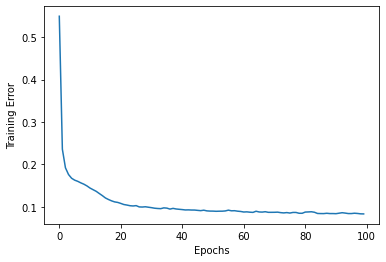

In [5]:
# Training for photo to sketch
from keras.callbacks import TensorBoard
# Train the autoencoder model
train_image.shape
#hist=autoencoder.fit(train_image, train_sketch_image, epochs = 5, verbose = 0)

hist=autoencoder.fit(train_image, train_sketch_image,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(test_image, test_sketch_image))



plt.plot(hist.history["loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

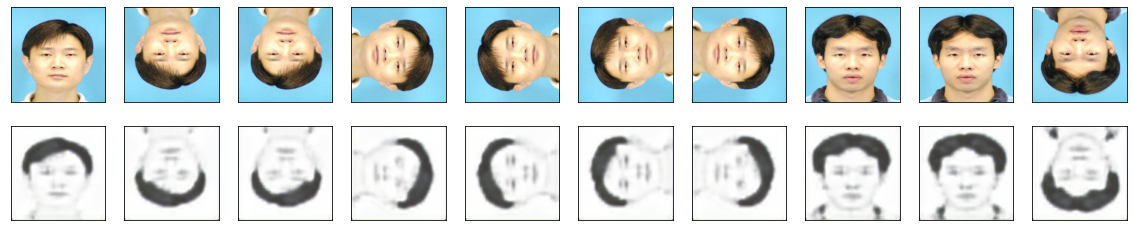

In [6]:
decoded_imgs = autoencoder.predict(test_image)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_image[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Train Model for Sketch to Face

Epoch 1/100
11/11 [==============================] - 3s 235ms/step - loss: 0.2193 - acc: 0.4048 - val_loss: 0.1895 - val_acc: 0.1083
Epoch 2/100
11/11 [==============================] - 3s 228ms/step - loss: 0.1745 - acc: 0.1047 - val_loss: 0.1579 - val_acc: 0.4260
Epoch 3/100
11/11 [==============================] - 2s 227ms/step - loss: 0.1609 - acc: 0.3204 - val_loss: 0.1435 - val_acc: 0.1549
Epoch 4/100
11/11 [==============================] - 3s 229ms/step - loss: 0.1567 - acc: 0.2517 - val_loss: 0.1419 - val_acc: 0.2098
Epoch 5/100
11/11 [==============================] - 3s 228ms/step - loss: 0.1546 - acc: 0.2106 - val_loss: 0.1399 - val_acc: 0.2143
Epoch 6/100
11/11 [==============================] - 2s 228ms/step - loss: 0.1530 - acc: 0.3167 - val_loss: 0.1382 - val_acc: 0.2620
Epoch 7/100
11/11 [==============================] - 2s 228ms/step - loss: 0.1523 - acc: 0.2626 - val_loss: 0.1374 - val_acc: 0.2578
Epoch 8/100
11/11 [==============================] - 3s 229ms/step - 

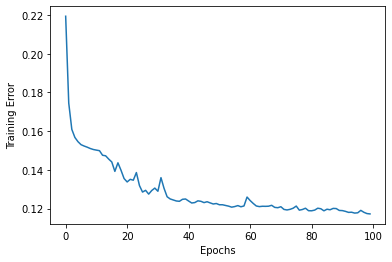

In [7]:
# Training for Sketch to Photo
# Training
from keras.callbacks import TensorBoard
# Train the autoencoder model
train_image.shape
#hist=autoencoder.fit(train_image, train_sketch_image, epochs = 5, verbose = 0)

hist=autoencoder.fit(train_sketch_image,train_image,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(test_sketch_image, test_image))



plt.plot(hist.history["loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


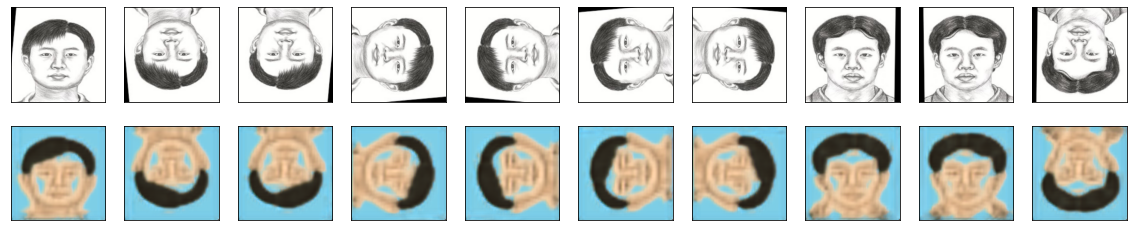

In [8]:
decoded_imgs = autoencoder.predict(test_sketch_image)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_sketch_image[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()